In [18]:
import pandas as pd

prices_df = pd.read_csv("../data/sample_prices.csv")
returns_df = prices_df.pct_change()
returns_df

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [19]:
returns_df.dropna(inplace=True)
returns_df

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


In [20]:
returns_df.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [21]:
deviations = returns_df.sub(returns_df.mean())
squared_deviations = deviations.pow(2)
variance = squared_deviations.mean()
variance

BLUE      0.000527
ORANGE    0.005808
dtype: float64

In [22]:
volatility = variance.pow(0.5)
volatility

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [23]:
returns_df.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [24]:
deviations = returns_df.sub(returns_df.mean())
squared_deviations = deviations.pow(2)
number_of_observations = len(returns_df)
variance = squared_deviations.sum().div(number_of_observations- 1)
volatility = variance.pow(0.5)

volatility 

BLUE      0.023977
ORANGE    0.079601
dtype: float64

### Annualizing volatility

In [25]:
import numpy as np 

returns_df.std() * np.sqrt(12)

BLUE      0.083060
ORANGE    0.275747
dtype: float64

In [27]:
returns_df.std().multiply(np.sqrt(12))

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Analyzing Portfolio Data

In [30]:
data = pd.read_csv(
    "../data/Portfolios_Formed_on_ME_monthly_EW.csv",
    index_col=0,
    parse_dates=True, 
    na_values=-99.99
)
data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [33]:
columns_list = ["Lo 10", "Hi 10"]
data = data[columns_list].div(100)
data.head()

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


In [34]:
data.columns = ["SmallCap", "LargeCap"]
data.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


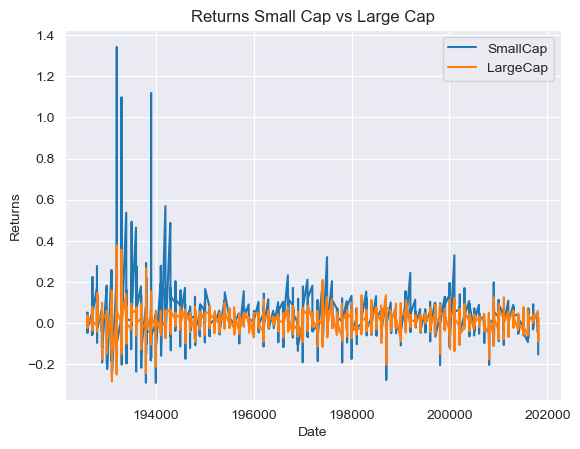

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

data.plot()
plt.title("Returns Small Cap vs Large Cap")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.grid(True);

In [37]:
data.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [38]:
annualized_vol = data.std().multiply(np.sqrt(12))
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [41]:
n_months = len(data)
return_per_month = data.add(1).prod().pow(1 / n_months).sub(1)
return_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [42]:
annualized_return = return_per_month.add(1).pow(12).sub(1)
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

Different way to calculate annualized return

In [43]:
annualized_return  = data.add(1).prod().pow(12 / n_months).sub(1)
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

# Computing Return on Risk and Sharpe Ratios

In [44]:
return_on_risk_ratio  = annualized_return.div(annualized_vol)
return_on_risk_ratio

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [46]:
risk_free_asset = 0.03
excess_return = annualized_return.sub(risk_free_asset)
sharpe_ratio = excess_return.div(annualized_vol)
sharpe_ratio

SmallCap    0.373346
LargeCap    0.336392
dtype: float64